In [1]:
#Data Collection
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#load csv data file
chess_data = pd.read_csv('./games.csv')

In [3]:
#summary of data
chess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
chess_data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
chess_data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [6]:
chess_data['winner'].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

In [7]:
chess_data['victory_status'].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

In [8]:
chess_data['rated'].value_counts()

True     16155
False     3903
Name: rated, dtype: int64

In [12]:
chess_data[(chess_data['winner'] == 'draw') & (chess_data['victory_status'] != 'draw')].count()

id                44
rated             44
created_at        44
last_move_at      44
turns             44
victory_status    44
winner            44
increment_code    44
white_id          44
white_rating      44
black_id          44
black_rating      44
moves             44
opening_eco       44
opening_name      44
opening_ply       44
dtype: int64

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

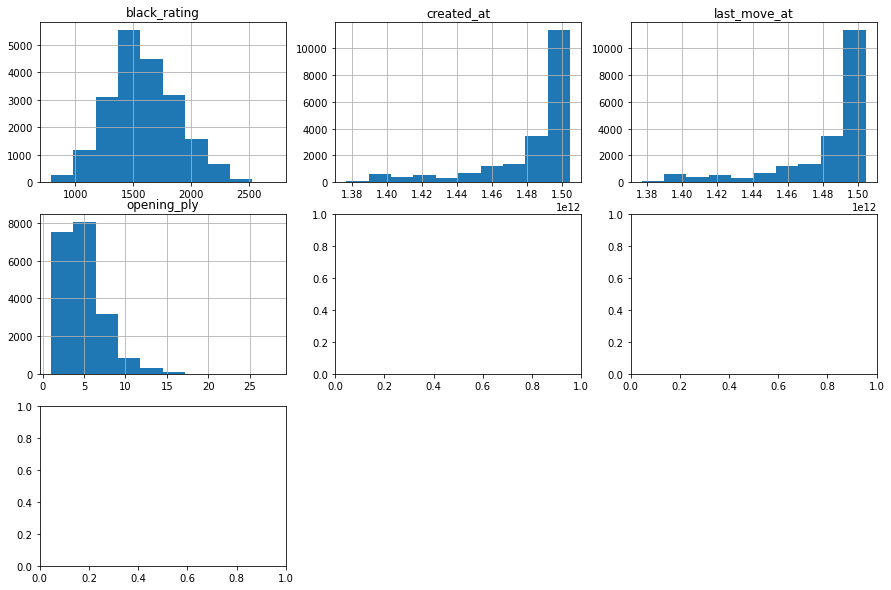

In [13]:
chess_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [17]:
chess_data['id'].nunique()

19113

In [18]:
chess = chess_data[chess_data.columns.difference(['created_at', 'last_move_at', 'white_id', 'black_id', 'moves', 'opening_eco'])]

In [19]:
chess.head()

,black_rating,id,increment_code,opening_name,opening_ply,rated,turns,victory_status,white_rating,winner
0,1191,TZJHLljE,15+2,Slav Defense: Exchange Variation,5,False,13,outoftime,1500,white
1,1261,l1NXvwaE,5+10,Nimzowitsch Defense: Kennedy Variation,4,True,16,resign,1322,black
2,1500,mIICvQHh,5+10,King's Pawn Game: Leonardis Variation,3,True,61,mate,1496,white
3,1454,kWKvrqYL,20+0,Queen's Pawn Game: Zukertort Variation,3,True,61,mate,1439,white
4,1469,9tXo1AUZ,30+3,Philidor Defense,5,True,95,mate,1523,white


In [20]:
chess = chess_data[chess_data.columns.difference(['created_at', 'last_move_at', 'white_id', 'black_id', 'moves', 'opening_eco', 'increment_code'])]